# 주가의 주성분 분석

## Scikit-Learn 패키지

* 데이터 분석 및 머신 러닝 패키지
* 주성분 분석용 `PCA` 및 `KernelPCA` 클래스 제공

In [72]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA

## 데이터 수집

* DAX 인덱스와 30개 구성 종목

In [54]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [55]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data = data.dropna()

CPU times: user 190 ms, sys: 100 ms, total: 290 ms
Wall time: 12 s


In [56]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [57]:
dax.tail()

,^GDAXI
Date,
2016-07-01,9776.120117
2016-07-04,9709.089844
2016-07-05,9532.610352
2016-07-06,9373.259766
2016-07-07,9418.780273


In [58]:
data[data.columns[-10:]].head()

,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,
2010-01-04,85.00,27.760,65.21,108.30,68.7311,32.940,41.740,63.4424,27.395,64.50
2010-01-05,83.02,28.495,64.73,108.50,68.2926,32.645,44.525,63.4811,27.765,63.25
2010-01-06,84.44,28.350,64.69,107.80,68.1630,33.225,45.020,63.7137,27.630,65.00
2010-01-07,83.92,28.935,66.05,108.05,67.8740,34.105,46.200,64.4696,27.550,65.75
2010-01-08,83.10,28.505,65.38,107.85,67.7743,34.345,46.040,64.8765,28.070,66.46


## 데이터 전처리

In [59]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [60]:
data_scaled = data.apply(scale_function)

In [61]:
data_scaled[data_scaled.columns[-10:]].head()

,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,
2010-01-04,-1.821623,-2.262805,-0.985823,-0.973070,2.654733,-1.752686,0.714841,-1.818839,1.357897,-1.853994
2010-01-05,-1.899978,-2.182281,-1.008376,-0.966252,2.623261,-1.778515,0.971982,-1.815333,1.435248,-1.883011
2010-01-06,-1.843784,-2.198167,-1.010256,-0.990114,2.613959,-1.727732,1.017685,-1.794265,1.407026,-1.842388
2010-01-07,-1.864362,-2.134076,-0.946356,-0.981592,2.593217,-1.650681,1.126636,-1.725799,1.390301,-1.824978
2010-01-08,-1.896812,-2.181186,-0.977836,-0.988410,2.586062,-1.629667,1.111863,-1.688943,1.499011,-1.808496


## PCA 적용

In [62]:
pca = KernelPCA().fit(data_scaled)

In [63]:
# 고유값 갯수
len(pca.lambdas_)

829

In [64]:
pca.lambdas_[:10].round()

array([ 31610.,   5775.,   5016.,   2346.,   1681.,    931.,    503.,
          375.,    293.,    221.])

In [65]:
get_we = lambda x: x / x.sum()

In [66]:
get_we(pca.lambdas_)[:10]

array([ 0.63628093,  0.11623631,  0.10096121,  0.04723225,  0.03384035,
        0.01874098,  0.01012841,  0.00754908,  0.00589505,  0.0044564 ])

In [67]:
get_we(pca.lambdas_)[:5].sum()

0.93455104400558264

## 단일 성분 PCA

In [68]:
pca = KernelPCA(n_components=1).fit(data_scaled)
dax['PCA_1'] = pca.transform(-data)

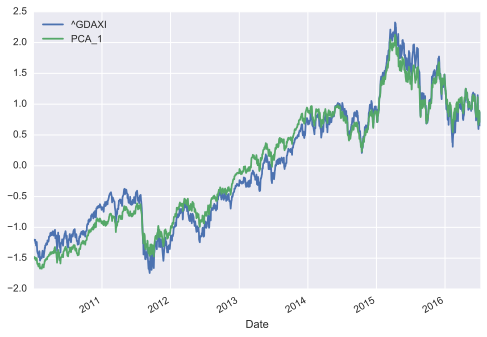

In [69]:
dax.apply(scale_function).plot()
plt.show()

## 5개 성분 PCA

In [81]:
pca = KernelPCA(n_components=5).fit(data_scaled)
pca_components = pca.transform(data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

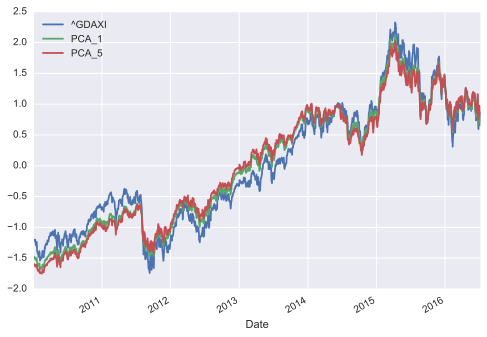

In [82]:
dax.apply(scale_function).plot()
plt.show()

## DAX 지수와 주성분 간의 회귀 분석

In [83]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 733776.,  733777.,  733778., ...,  736150.,  736151.,  736152.])

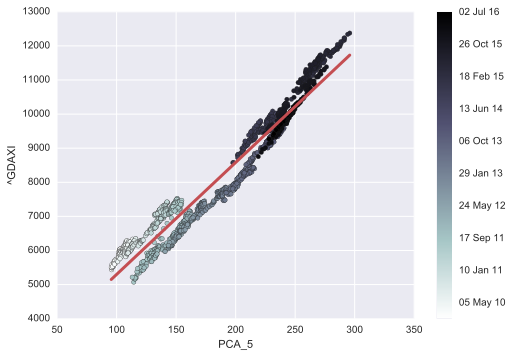

In [84]:
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates, cmap=mpl.cm.bone_r)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'], dax['^GDAXI'], 1), dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), 
             format=mpl.dates.DateFormatter('%d %b %y'))
plt.show()

In [86]:
cut_date = '2011/7/1'

In [87]:
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dax['^GDAXI'][dax.index < cut_date], 1), 
                       early_pca)

In [89]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dax['^GDAXI'][dax.index >= cut_date], 1),
                      late_pca)

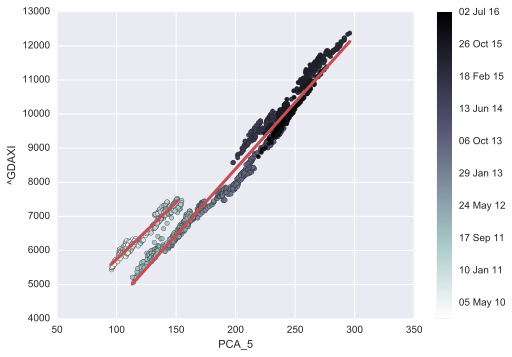

In [91]:
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates, cmap=mpl.cm.bone_r)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
plt.show()